<font color='orange'>**Please create your own copy before starting modification**</font>

Dependencies: Add Your dependencies here

In [513]:
import pandas as pd
import sklearn as sk
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.tree import DecisionTreeRegressor as dtr
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import OrdinalEncoder as oe
from sklearn.model_selection import train_test_split as tts
from sklearn.model_selection import cross_val_score as cvs

Code

<font color='red'>**Part 1**</font>

<font color='cyan'>**Dataset: The dataset represents the mood of a student to go to class depending on the weather at IIT Jodhpur. We have been accustomed to online classes so this is to give you folks a feeling of attending classes in the post COVID scenario.**</font>

A sample of the dataset is shown

In [514]:
dic = {'Time':'Morning','Temperature':'Hot','Friend_Attending':'No','Windy':'Yes','Attend':'Yes'}
df= pd.DataFrame(dic,index=[0])
df

,Time,Temperature,Friend_Attending,Windy,Attend
0,Morning,Hot,No,Yes,Yes


Read the complete data from the CSV file at link: "Add Link to CSV here"



In [515]:
ques_1 = pd.read_csv('/content/Data_Decision_Trees - Sheet1.csv')
ques_1.head()

,Time,Temperature,Friend_Attending,Windy,Attend
0,Morning,Hot,Yes,Low,No
1,Morning,Hot,Yes,High,No
2,Afternoon,Hot,Yes,Low,Yes
3,Evening,Warm,Yes,Low,Yes
4,Evening,Cool,No,Low,Yes


<font color='red'>**Part 2**</font>

Implement the same using Scikit Learn

Preprocessing

In [516]:
encoder_value = oe()
ques_1["Friend_Encoding"] = encoder_value.fit_transform(ques_1[["Friend_Attending"]])
ques_1["Windy_Encoding"] = encoder_value.fit_transform(ques_1[["Windy"]])
ques_1["Attend_Encoding"] = encoder_value.fit_transform(ques_1[["Attend"]])
ques_1["Time_Encoding"] = encoder_value.fit_transform(ques_1[["Time"]])
ques_1["Temperature_Encoding"] = encoder_value.fit_transform(ques_1[["Temperature"]])
Y = ['Attend_Encoding']
X = ['Friend_Encoding','Windy_Encoding','Time_Encoding','Temperature_Encoding']




Shuffle the data frame

In [517]:
ques_1 = ques_1.sample(frac=1)


Take two for testing and rest for training

In [518]:
x_train , x_test , y_train , y_test = tts(ques_1[X],ques_1[Y],test_size = 0.1)


Display Training

In [519]:
print(x_train)
print(y_train)

    Friend_Encoding  Windy_Encoding  Time_Encoding  Temperature_Encoding
4               0.0             1.0            1.0                   0.0
7               1.0             1.0            2.0                   2.0
11              1.0             0.0            0.0                   2.0
13              1.0             0.0            1.0                   2.0
12              0.0             1.0            0.0                   1.0
5               0.0             0.0            1.0                   0.0
8               0.0             1.0            2.0                   0.0
10              0.0             0.0            2.0                   2.0
0               1.0             1.0            2.0                   1.0
3               1.0             1.0            1.0                   2.0
9               0.0             1.0            1.0                   2.0
6               0.0             0.0            0.0                   0.0
    Attend_Encoding
4               1.0
7          

Display Testing

In [520]:
print(x_test)
print(y_test)

   Friend_Encoding  Windy_Encoding  Time_Encoding  Temperature_Encoding
1              1.0             0.0            2.0                   1.0
2              1.0             1.0            0.0                   1.0
   Attend_Encoding
1              0.0
2              1.0


Given the follwing data construct a decision tree using Entropy

In [521]:
model = dtc(criterion = "entropy")
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Fit the classifier using Gini Impurity

In [522]:
model_ii = dtc()
model_ii.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Print the cross validation score with folds = 5

In [523]:
score_i = cvs(model,x_train,y_train)
score_ii = cvs(model_ii,x_train,y_train)
print("Data for Decision Tree Classifier with Entropy")
print("Accuracy = ",score_i.mean()*100)
print("Standard Deviation = ",score_i.std())
print("\nData for Decision Tree Classifier with Gini")
print("Accuracy = ",score_ii.mean()*100)
print("Standard Deviation = ",score_ii.std())
print(" ")

Data for Decision Tree Classifier with Entropy
Accuracy =  50.0
Standard Deviation =  0.33333333333333337

Data for Decision Tree Classifier with Gini
Accuracy =  40.0
Standard Deviation =  0.37416573867739417
 


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


Print the depth of the decison Tree

In [524]:
print('Depth of Decision Tree Classifier with Entropy = ', model.get_depth())
print('Depth of Decision Tree Classifier with Gini = ',model_ii.get_depth())

Depth of Decision Tree Classifier with Entropy =  4
Depth of Decision Tree Classifier with Gini =  4


Print the number of leaves in the decision Tree

In [525]:
print('Number of Leave Nodes in Decision Tree Classifier with Entropy = ',model.get_n_leaves())
print('Number of Leave Nodes in Decision Tree Classifier with Gini = ',model_ii.get_n_leaves())

Number of Leave Nodes in Decision Tree Classifier with Entropy =  7
Number of Leave Nodes in Decision Tree Classifier with Gini =  8


Return the index of the leaf that each sample is predicted as.



In [526]:
print('Indexes of Samples, predicted by Decision Tree Classifier with Entropy = ',model.apply(x_train))
print('Indexes of Samples, predicted by Decision Tree Classifier with  Gini   = ',model_ii.apply(x_train)) 

Indexes of Samples, predicted by Decision Tree Classifier with Entropy =  [ 7 12  1 10  1  5  7  6 12 11  7  1]
Indexes of Samples, predicted by Decision Tree Classifier with  Gini   =  [ 7 14 11 12  7  5  7  6 14 13  7  4]


Print the decision path

In [527]:
print("Decision Path of each sample, predicted by Decision Tree Classifier with Entropy :-")
print(model.decision_path(x_test))
print(" ")
print("Decision Path of each sample, predicted by Decision Tree Classifier with Gini :-")
print(model_ii.decision_path(x_test))

Decision Path of each sample, predicted by Decision Tree Classifier with Entropy :-
  (0, 0)	1
  (0, 2)	1
  (0, 8)	1
  (0, 12)	1
  (1, 0)	1
  (1, 1)	1
 
Decision Path of each sample, predicted by Decision Tree Classifier with Gini :-
  (0, 0)	1
  (0, 8)	1
  (0, 14)	1
  (1, 0)	1
  (1, 8)	1
  (1, 9)	1
  (1, 13)	1


Print the gini impurity of each feature

In [528]:
result = model.feature_importances_
print("Gini Impurity of each features of Decision Tree Classifier with Entropy")
for i,v in enumerate(result):
  print('Feature: %0d, Score: %.5f' % (i,v))
print(" ")
print("Gini Impurity of each features of Decision Tree Classifier with Gini")
result_ii = model_ii.feature_importances_
for i,v in enumerate(result_ii):
	print('Feature: %0d, Score: %.5f' % (i,v))

Gini Impurity of each features of Decision Tree Classifier with Entropy
Feature: 0, Score: 0.18739
Feature: 1, Score: 0.32757
Feature: 2, Score: 0.48505
Feature: 3, Score: 0.00000
 
Gini Impurity of each features of Decision Tree Classifier with Gini
Feature: 0, Score: 0.22857
Feature: 1, Score: 0.13393
Feature: 2, Score: 0.57500
Feature: 3, Score: 0.06250


Training Accuracy

In [529]:
print("Training Accuracy for Decision Tree Classifier with Entropy = ",model.score(x_train,y_train)*100)
print("Training Accuracy for Decision Tree Classifier with Gini = ",model_ii.score(x_train,y_train)*100)

Training Accuracy for Decision Tree Classifier with Entropy =  100.0
Training Accuracy for Decision Tree Classifier with Gini =  100.0


Testing accuracy

In [530]:
print("Training Accuracy for Decision Tree Classifier with Entropy = ",model.score(x_test,y_test)*100)
print("Training Accuracy for Decision Tree Classifier with Gini = ",model_ii.score(x_test,y_test)*100)

Training Accuracy for Decision Tree Classifier with Entropy =  100.0
Training Accuracy for Decision Tree Classifier with Gini =  100.0


Map the query: [Time: Morning, Temperature: Warm, Friend_Attending: No, 'Wind': Low] to the correct numerical value as the training and the predict the output.

In [531]:
Query = model.predict([[2.0,2.0,0.0,1.0]])
print(Query)


[1.]


<font color='red'>**Part 3**</font>

Plot the decision tree

The decision tree using entropy as classifier : 



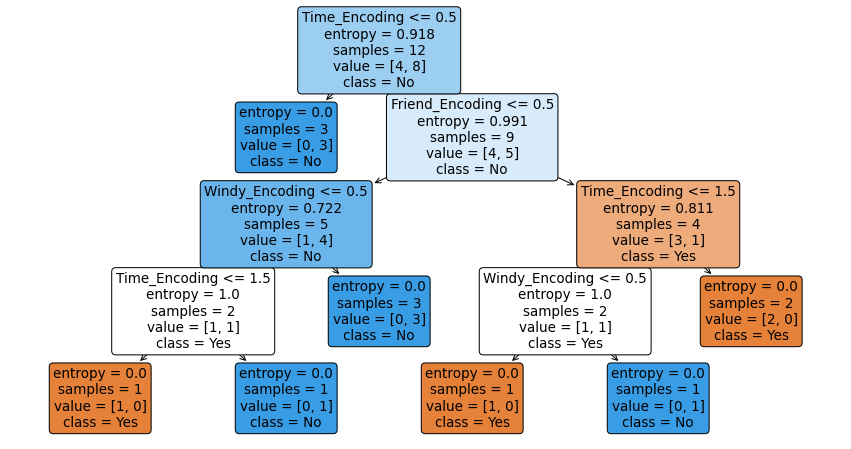

In [532]:

print("The decision tree using entropy as classifier : \n")


plt.figure(figsize=(15,8))
tree.plot_tree(model,
          filled=True,
          rounded=True,
          class_names=["Yes", "No"],
          feature_names=ques_1[X].columns);


The decision tree using gini index as classifier : 



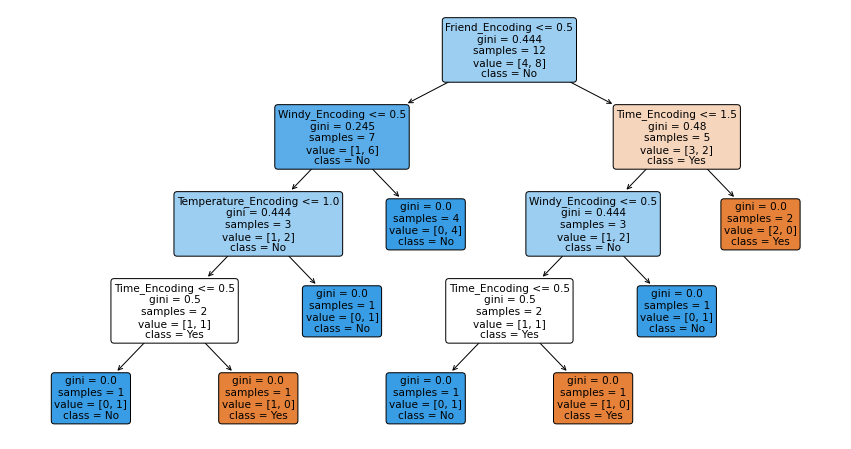

In [533]:
print("The decision tree using gini index as classifier : \n")
#print(tree.plot_tree(classifier2))

plt.figure(figsize=(15,8))
tree.plot_tree(model_ii,
          filled=True,
          rounded=True,
          class_names=["Yes", "No"],
          feature_names=ques_1[X].columns);

Plot the decision surface

(-1.0, 2.9900000000000038, -1.0, 2.9900000000000038)

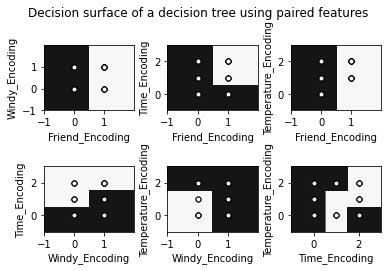

In [534]:
n_classes = 2
plot_colors = "bw"
plot_step = 0.01

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],[1, 2], [1, 3], [2, 3]]):
    
    x = ques_1.loc[:,[X[pair[0]],X[pair[1]]]]
    y = ques_1.loc[:,Y]

    # Train
    clf = model.fit(x, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = x.iloc[:, 0].min() - 1, x.iloc[:, 0].max() + 1
    y_min, y_max = x.iloc[:, 1].min() - 1, x.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap='Greys')

    plt.xlabel(X[pair[0]])
    plt.ylabel(X[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = ques_1.where(y == i)
        plt.scatter(x.iloc[list(idx.index.values), 0], x.iloc[list(idx.index.values), 1], c=color,
                    cmap='Greys', edgecolor='black', s=25)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.axis("tight")

<font color='magenta'>**Part 04: Not Compulsory**</font>

Advanced: Can you implement the partitioning of the decision tree using the following algorithm

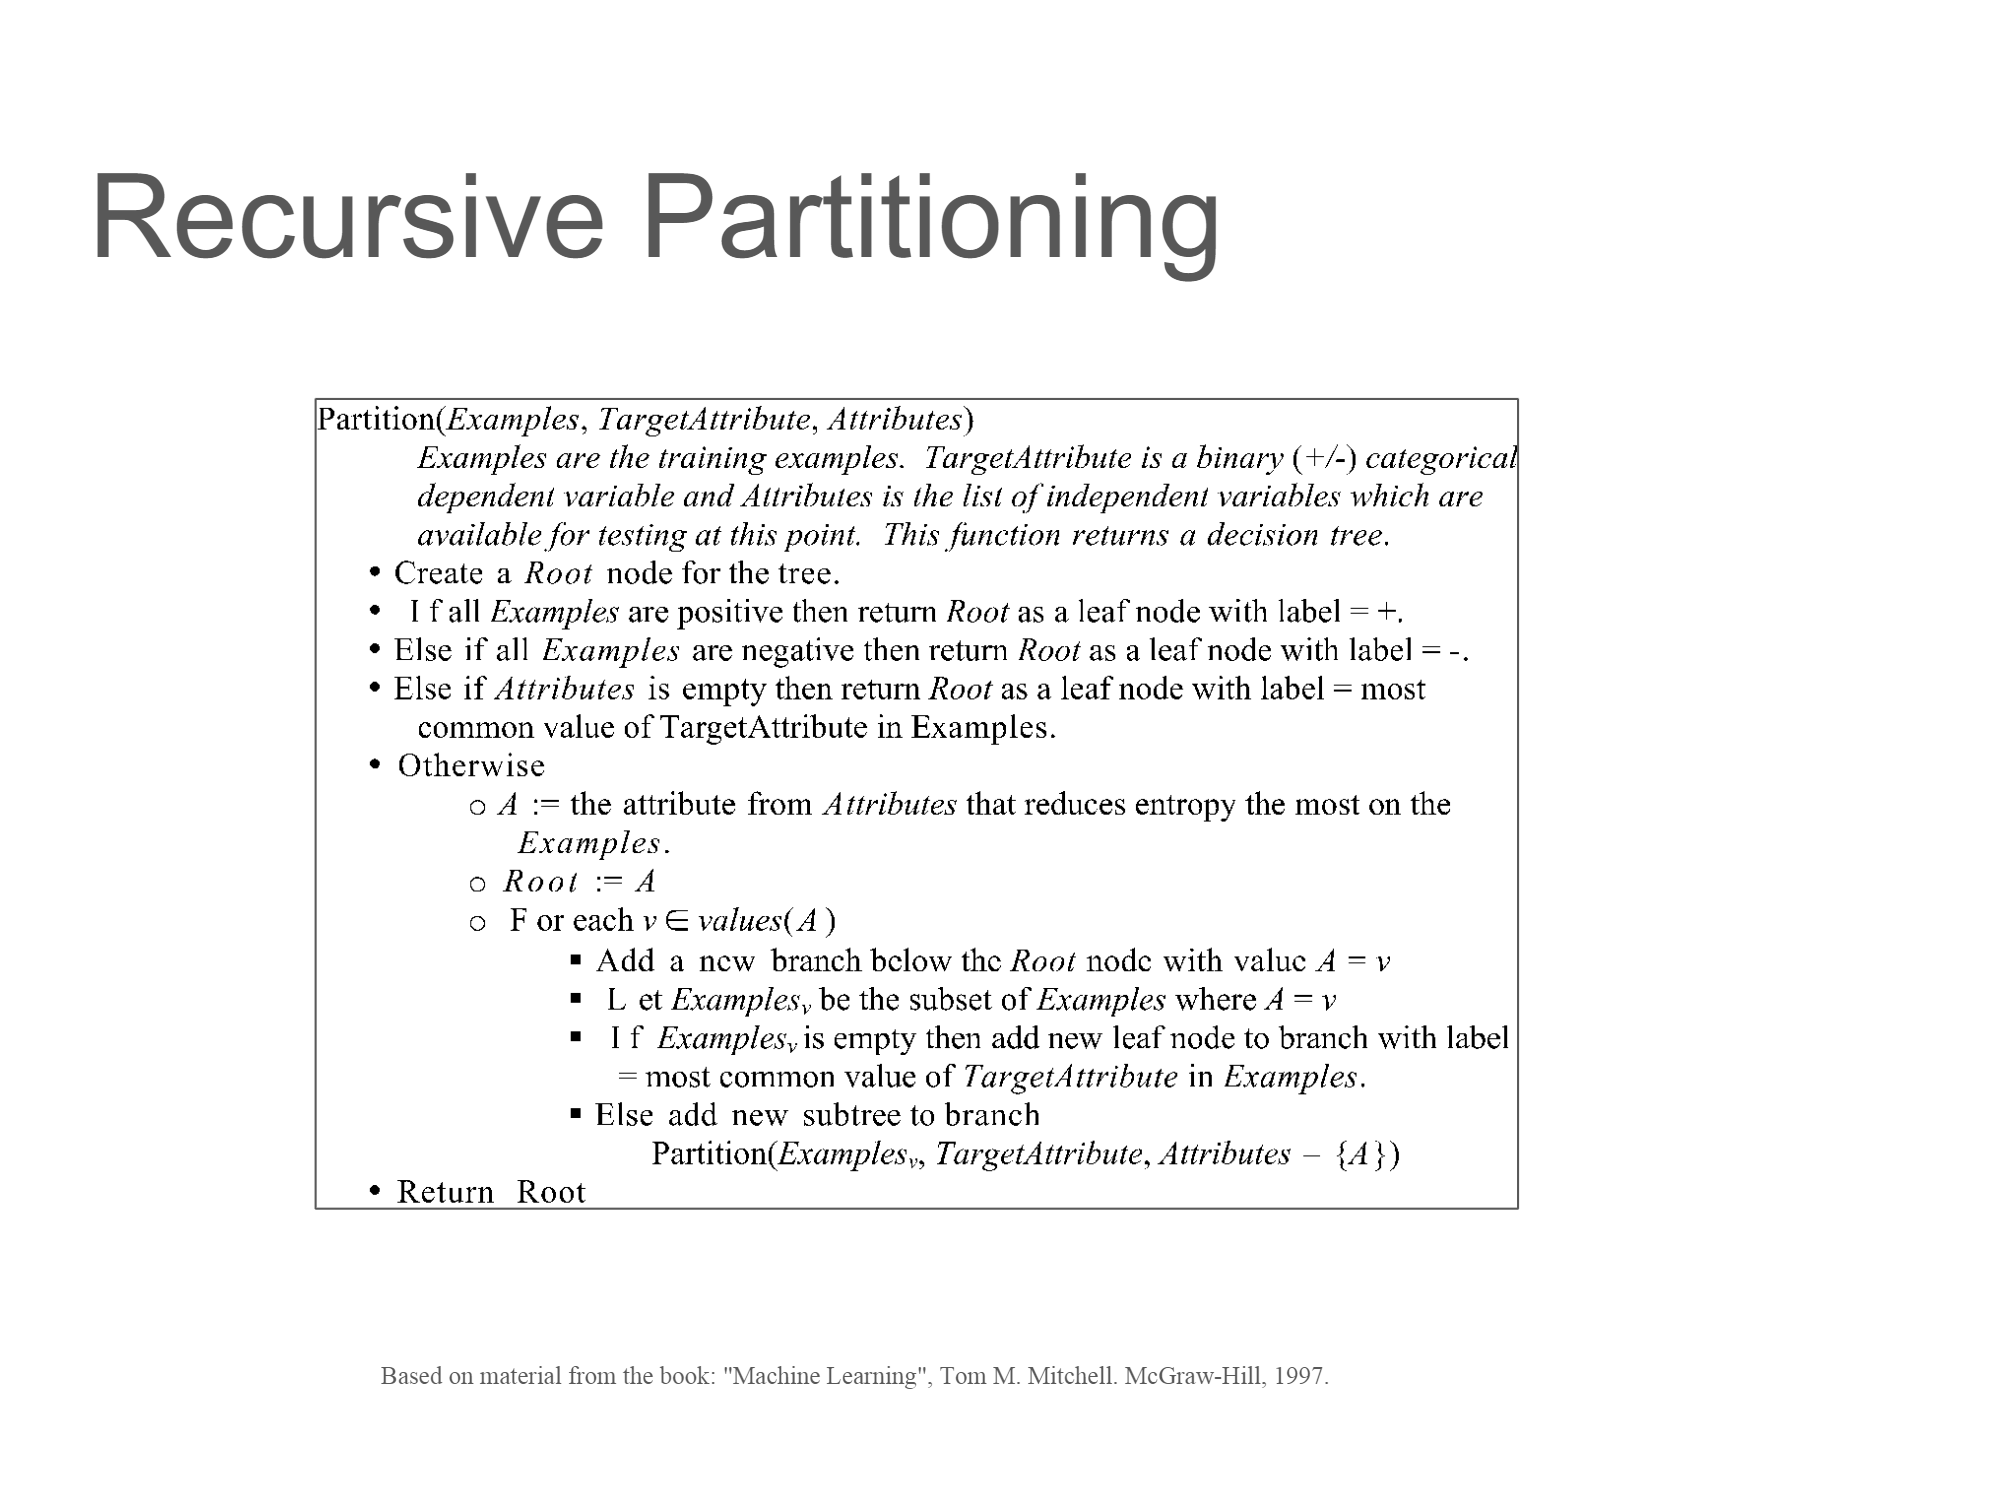

Part 5: Building Decision Trees when the data is of a continuous nature

In the previous case the nodes were broken based on entropy/gini impurity. In the case of regression the mean sqaured error is the decsion parameter for splitting the nodes. The following dataset contains continuous data and we need to use decision trees with regression.

Read the dataset

In [535]:
ques_2 = pd.read_csv('/content/death.csv',na_values=["**","*"])

Preprocess the dataset to remove all the rows with empty column values

In [544]:
ques_2 = ques_2.dropna()
ques_2

,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend,recent_trend_(2)_encoding,met_objective_of_45.5?_(1)_encoding,county_encoding
0,United States,0,No,46.0,45.9,46.1,157376.0,falling,-2.4,-2.6,-2.2,0.0,0.0,2452.0
1,"Perry County, Kentucky",21193,No,125.6,108.9,144.2,43.0,stable,-0.6,-2.7,1.6,2.0,0.0,1910.0
2,"Powell County, Kentucky",21197,No,125.3,100.2,155.1,18.0,stable,1.7,0.0,3.4,2.0,0.0,1992.0
4,"Owsley County, Kentucky",21189,No,118.5,83.1,165.5,8.0,stable,2.2,-0.4,4.8,2.0,0.0,1863.0
5,"Union County, Florida",12125,No,113.5,89.9,141.4,19.0,falling,-2.2,-4.3,0.0,0.0,0.0,2436.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2807,"Los Alamos County, New Mexico",35028,Yes,15.8,9.4,25.4,4.0,stable,-2.9,-5.8,0.0,2.0,1.0,1456.0
2808,"Eagle County, Colorado",8037,Yes,14.9,8.7,23.6,5.0,falling,-4.9,-9.3,-0.3,0.0,1.0,717.0
2810,"Utah County, Utah",49049,Yes,12.4,10.7,14.4,37.0,falling,-2.8,-3.9,-1.8,0.0,1.0,2456.0
2811,"McKinley County, New Mexico",35031,Yes,11.6,8.0,16.2,7.0,falling,-3.2,-5.7,-0.7,0.0,1.0,1589.0


Convert Categorical Values to numerical

In [537]:
convert = oe()
ques_2["recent_trend_(2)_encoding"]=convert.fit_transform(ques_2[["Recent Trend (2)"]])
ques_2["met_objective_of_45.5?_(1)_encoding"]=convert.fit_transform(ques_2[["Met Objective of 45.5? (1)"]])
ques_2["county_encoding"]=convert.fit_transform(ques_2[["County"]])
ques_2['Average Deaths per Year'] = ques_2['Average Deaths per Year'].str.replace(",","")
ques_2['Average Deaths per Year'] = ques_2['Average Deaths per Year'].astype(float)


Split the dataset into train and test(Based on split size)

In [538]:
X=["county_encoding","FIPS","met_objective_of_45.5?_(1)_encoding","Age-Adjusted Death Rate","Lower 95% Confidence Interval for Death Rate","Upper 95% Confidence Interval for Death Rate","Average Deaths per Year","recent_trend_(2)_encoding","Recent 5-Year Trend (2) in Death Rates","Lower 95% Confidence Interval for Trend"]
Y=["Upper 95% Confidence Interval for Trend"]
x_tr , x_te , y_tr , y_te = tts(ques_2[X],ques_2[Y],test_size = 0.1)

Perform the decision tree regression

In [539]:
model = dtr()
model.fit(x_tr,y_tr)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Predict on test dataset

In [543]:
y_pred = model.predict(x_te)
y_pred

array([ 0.4,  0.5,  0.5,  2.1, -0.2,  1.4,  0.1,  1.7,  0.4,  2.9, -0.4,
       -1.4, -5.1, -2. , -0.5, -3.8,  0.4,  0.2,  2.6, -0.7, -0.7, -1.3,
        2. , -0.4,  1.1,  2.8,  1.5,  1.1, -1.3, -0.6,  1.5, -0.4,  1.1,
        0.3,  0.6,  2.1,  0.5,  1.7,  2. ,  1.5,  0.9,  0.6,  3.9,  1.4,
        1.2,  2.5,  1.7,  0.3, -1.9, -0.5,  2.5, -0.6,  0.6,  1.6,  1.5,
       -1.2,  5.4,  1.3, -0.5,  0. ,  0.5, -0.8,  1. ,  2. ,  0.1,  0.8,
        0.9,  0.2, -0.7, -1.1,  1.4,  0.9,  1. ,  1.2,  0.6, -0.3,  0.5,
        1.5,  1.9, -0.1, -1.4,  0.4,  2.5,  1.9,  1.2,  0.4,  0.6, -0.9,
       -2.1,  3.3,  0.3,  1.3, -0.6,  1.3,  2.5, -0.4,  0.5,  1.7, -0.4,
        1.6, -1.8, -1.1,  0.3,  0.7,  3. ,  3.6,  1.3,  0.5,  1. , -1.5,
       -0.4,  4.1, -0.6,  1.3, -1.6,  3. ,  0.2,  3. , -1.5,  1.9,  0. ,
        0.7,  0.3,  2.1,  4.1,  0. ,  0.5,  2.6,  0.9,  1.1, -1. , -0.6,
       -5.1,  1.4, -1.9,  0.3, -0.5,  1.1,  0.5, -1.3,  0.7, -1.7,  1.9,
        1.9,  0.8,  0.1,  0.4, -0.2,  3.3,  2.9,  0

Calculate Squared Error between predicted and real values

In [541]:
mse(y_te,y_pred)

7.789296296296297

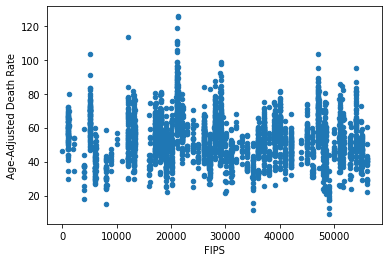

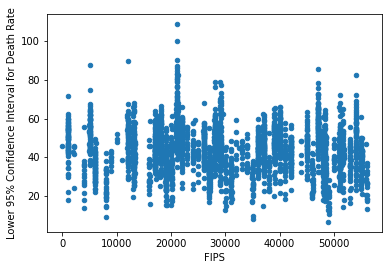

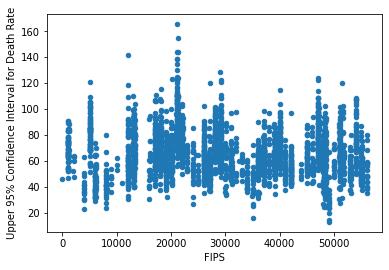

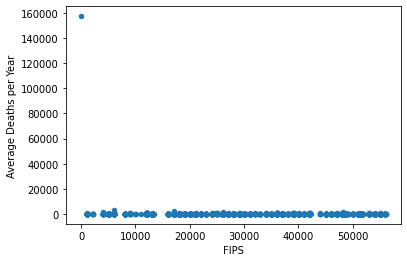

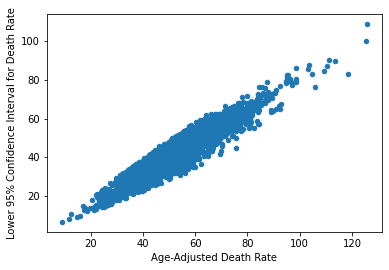

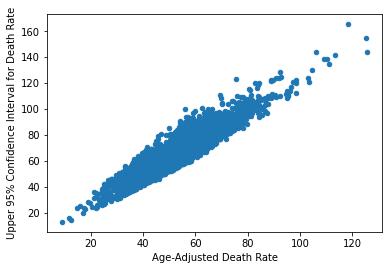

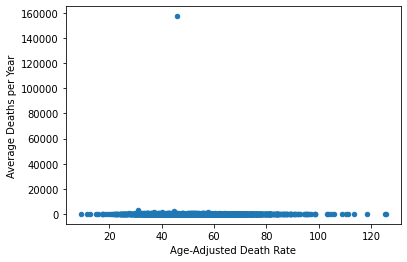

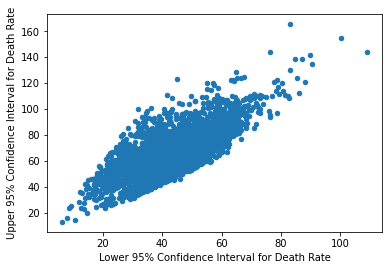

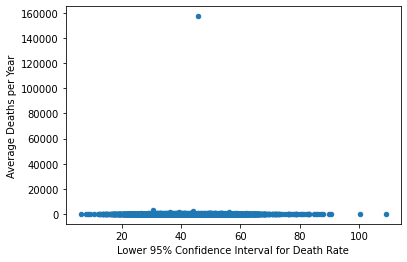

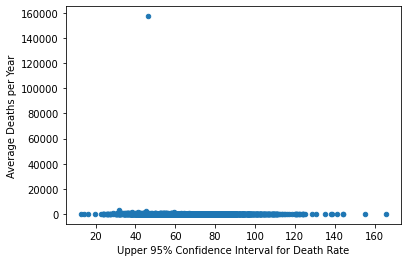

In [542]:
graph1 = ques_2.plot.scatter(x=X[1],y=X[3])
graph2 = ques_2.plot.scatter(x=X[1],y=X[4])
graph3 = ques_2.plot.scatter(x=X[1],y=X[5])
graph4 = ques_2.plot.scatter(x=X[1],y=X[6])
graph5 = ques_2.plot.scatter(x=X[3],y=X[4])
graph6 = ques_2.plot.scatter(x=X[3],y=X[5])
graph7 = ques_2.plot.scatter(x=X[3],y=X[6])
graph8 = ques_2.plot.scatter(x=X[4],y=X[5])
graph9 = ques_2.plot.scatter(x=X[4],y=X[6])
graph10 = ques_2.plot.scatter(x=X[5],y=X[6])



<font color='green'>**References**</font>



*   [Ref1](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

*   [Ref2](https://pbpython.com/categorical-encoding.html)


*   [Ref3](https://mljar.com/blog/visualize-decision-tree/)


*   [Ref4](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)


*   [Ref5](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

*   [Ref6](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)